Importing required libraries for data manipulation, numerical computations, plotting,
and machine learning model building and evaluation

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading the California housing dataset

In [157]:
mydata=pd.read_csv('California_Houses.csv')
mydata

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


 Defining the feature set by dropping the target column 'Median_House_Value'

In [158]:
x=mydata.drop(columns='Median_House_Value')
x

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


Defining the target variable 'Median_House_Value'

In [159]:
y=mydata['Median_House_Value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

Splitting data into training, validation, and test sets

In [160]:
train_x,temp_x,train_y,temp_y=train_test_split(x,y,test_size=0.3,random_state=0)
valid_x,test_x,valid_y,test_y=train_test_split(temp_x,temp_y,test_size=0.5,random_state=0)

Initializing and training a Linear Regression model on the training data

In [161]:
lr=LinearRegression()

In [162]:
lr.fit(train_x,train_y)

LinearRegression()

 Retrieving the intercept of the linear model

In [163]:
b = lr.intercept_
b

-1634189.0005757117

Retrieving the coefficients of the linear model

In [164]:
w = lr.coef_
w

array([ 3.95491123e+04,  8.76700798e+02, -5.82733555e+00,  1.00514103e+02,
       -3.69703125e+01,  4.22596646e+01, -4.53218034e+04, -2.69224146e+04,
       -2.31335137e-01, -1.50868894e-01,  2.50846700e-01,  1.79685519e-01,
       -1.57415373e-01])

Predicting the target variable on the training set

In [165]:
y_predict_train = lr.predict(train_x)
y_predict_train

array([ 78438.96296905, 184558.46168391, 293826.3988703 , ...,
       242823.73396774, 311637.48480112,  55538.21333839])

Plotting predicted vs. actual values for training data using Linear Regression

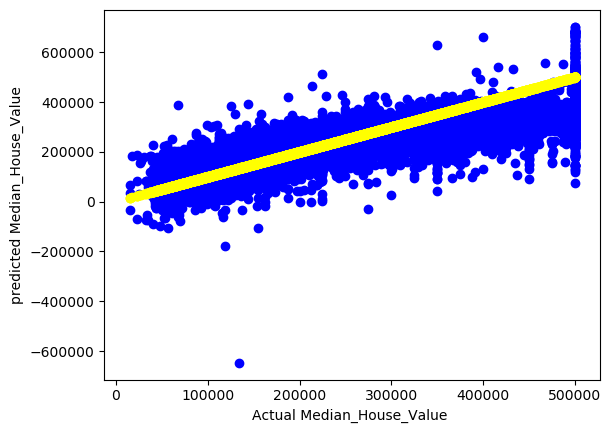

In [166]:
colors = np.random.rand(len(train_y))
plt.scatter(train_y, y_predict_train, color='blue', label='Predicted Values')
plt.scatter(train_y, train_y, color='yellow', label='Actual Values (train_y)')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()


Initializing a Lasso regression model and setting hyperparameters

In [167]:

lasso_lr = Lasso(max_iter=25000)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV and fit it to the training data
lasso_grid = GridSearchCV(estimator=lasso_lr, param_grid=param_grid, cv=5)
lasso_grid.fit(train_x, train_y)  # Ensure fitting happens here


GridSearchCV(cv=5, estimator=Lasso(max_iter=25000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [168]:
# Best model
lasso_best = lasso_grid.best_estimator_

Training the Lasso regression model on the training set

In [169]:
lasso_best.fit(train_x,train_y)

Lasso(alpha=10.0, max_iter=25000)

 Retrieving the intercept of the Lasso model

In [170]:
b1=lasso_best.intercept_
b1

-1634243.630439573

Retrieving the coefficients of the Lasso model

In [171]:
w1=lasso_best.coef_
w1

array([ 3.95453904e+04,  8.76964643e+02, -5.82438087e+00,  1.00501562e+02,
       -3.69728018e+01,  4.22628569e+01, -4.50147928e+04, -2.68392907e+04,
       -2.33246008e-01, -1.50767391e-01,  2.48925158e-01,  1.78917419e-01,
       -1.57039669e-01])

Predicting the target variable on the training set using Lasso regression

In [172]:
y_predict_train_lasso  = lasso_best.predict(train_x)
y_predict_train_lasso

array([ 78382.2617024 , 184560.00798553, 293839.03350085, ...,
       242718.53995947, 311664.15966706,  55370.41038278])

Plotting predicted vs. actual values for training data using Lasso Regression

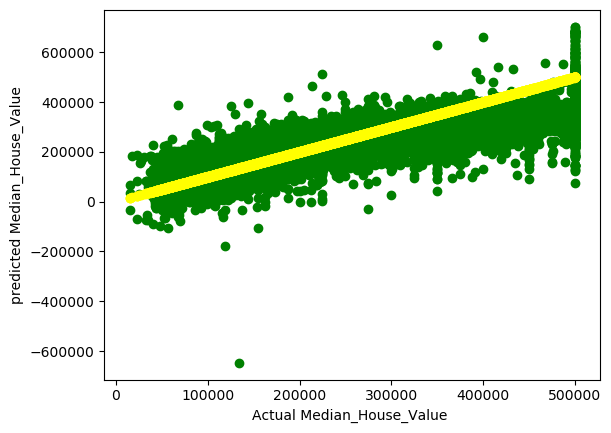

In [173]:
plt.scatter(train_y, y_predict_train_lasso, color='green', label='Predicted Values Lasso')
plt.scatter(train_y, train_y, color='yellow', label='Actual Values (train_y) Lasso')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()

Initializing Ridge regression model and setting hyperparameters for tuning

In [174]:
ridge_lr = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Example alpha values
ridge_grid = GridSearchCV(ridge_lr, param_grid, cv=5)
ridge_grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]})

Retrieving the best model from GridSearchCV for Ridge regression

In [175]:
ridge_lr_best = ridge_grid.best_estimator_
ridge_lr_best

Ridge()

Retrieving the intercept of the Ridge model

In [176]:
b2 = ridge_lr_best.intercept_
b2

-1636248.0013768512

Retrieving the coefficients of the Ridge model

In [177]:
w2=ridge_lr_best.coef_
w2

array([ 3.95480860e+04,  8.76802658e+02, -5.82657946e+00,  1.00518865e+02,
       -3.69706851e+01,  4.22512991e+01, -4.52203727e+04, -2.69121834e+04,
       -2.31828080e-01, -1.50819736e-01,  2.50104049e-01,  1.79458325e-01,
       -1.57283302e-01])

Predicting the target variable on the training set using Ridge regression

In [178]:
y_predict_train_ridge  = ridge_lr_best.predict(train_x)
y_predict_train_ridge

array([ 78426.43343299, 184558.03642373, 293830.1821897 , ...,
       242793.85735074, 311646.40417918,  55452.01813504])

Plotting predicted vs. actual values for training data using Ridge Regression

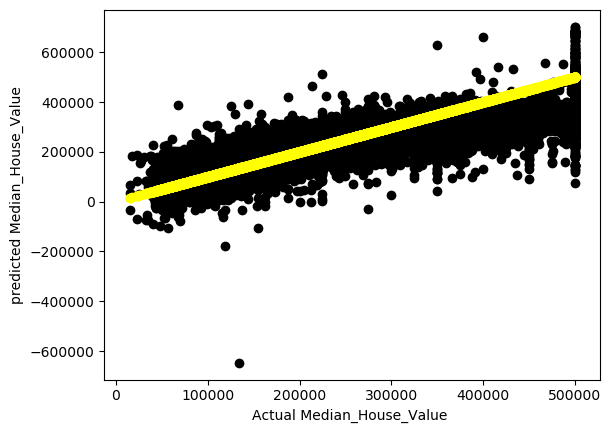

In [179]:
plt.scatter(train_y, y_predict_train_ridge, color='black', label='Predicted Values Ridge')
plt.scatter(train_y, train_y, color='yellow', label='Actual Values (train_y) Ridge')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()


Predicting target variable on validation set using Linear Regression

In [180]:
y_pred_valid_linear = lr.predict(valid_x)
y_pred_valid_linear

array([259406.01680206, 202538.90403711, 307000.0885884 , ...,
       283924.01088207, 273809.69654203, 350975.09810319])

Plotting predicted vs. actual values for validation data using Linear Regression

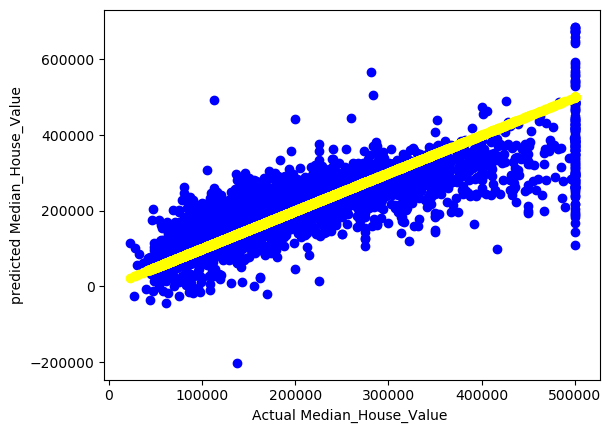

In [181]:
plt.scatter(valid_y, y_pred_valid_linear, color='blue', label='Predicted Values')
plt.scatter(valid_y, valid_y, color='yellow', label='Actual Values (valid_y)')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()


Predicting target variable on validation set using Lasso Regression

In [182]:
y_pred_valid_lasso = lasso_best.predict(valid_x)
y_pred_valid_lasso

array([259361.04549313, 202542.33083092, 306948.29487968, ...,
       283902.17432644, 273754.24632182, 350897.57635443])

Plotting predicted vs. actual values for validation data using Lasso Regression

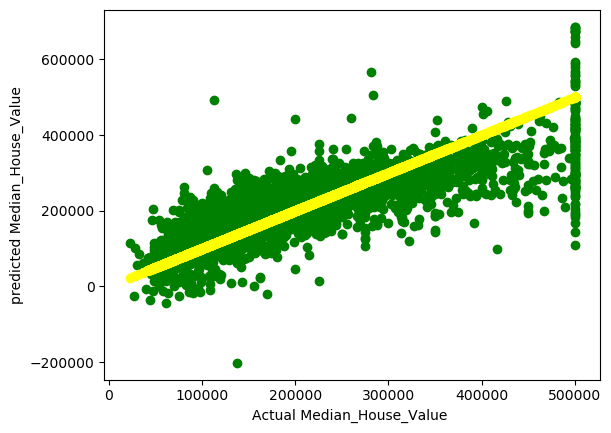

In [183]:
plt.scatter(valid_y, y_pred_valid_lasso, color='green', label='Predicted Values Lasso')
plt.scatter(valid_y, valid_y, color='yellow', label='Actual Values (valid_y) Lasso')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()


Predicting target variable on validation set using Ridge Regression

In [184]:
y_pred_valid_ridge = ridge_lr_best.predict(valid_x)
y_pred_valid_ridge

array([259392.4443467 , 202539.35373069, 306983.6710838 , ...,
       283917.7962051 , 273792.9672337 , 350952.15746314])

Plotting predicted vs. actual values for validation data using Ridge Regression

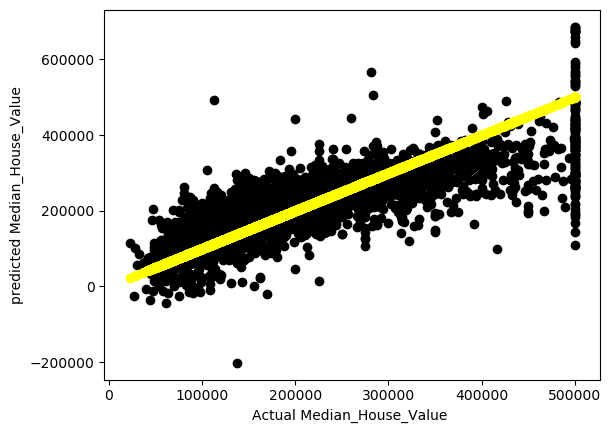

In [185]:
plt.scatter(valid_y, y_pred_valid_ridge, color='black', label='Predicted Values Ridge')
plt.scatter(valid_y, valid_y, color='yellow', label='Actual Values (valid_y) Ridge')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()


Function to evaluate model performance based on Mean Squared Error and Mean Absolute Error
Displaying performance of models on training set
Displaying performance of models on validation set

In [186]:

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, Mean Absolute Error: {mae:.2f}")


print("Training Set Performance:")
evaluate_model("Linear Regression", train_y, y_predict_train)
evaluate_model("Lasso Regression", train_y, y_predict_train_lasso)
evaluate_model("Ridge Regression", train_y, y_predict_train_ridge)

print("\nValidation Set Performance:")
evaluate_model("Linear Regression", valid_y, y_pred_valid_linear)
evaluate_model("Lasso Regression", valid_y, y_pred_valid_lasso)
evaluate_model("Ridge Regression", valid_y, y_pred_valid_ridge)


Training Set Performance:
Linear Regression - Mean Squared Error: 4667115397.86, Mean Absolute Error: 49882.56
Lasso Regression - Mean Squared Error: 4667119333.90, Mean Absolute Error: 49884.12
Ridge Regression - Mean Squared Error: 4667115737.18, Mean Absolute Error: 49883.01

Validation Set Performance:
Linear Regression - Mean Squared Error: 4781229115.58, Mean Absolute Error: 50357.18
Lasso Regression - Mean Squared Error: 4781206382.95, Mean Absolute Error: 50359.21
Ridge Regression - Mean Squared Error: 4781211539.20, Mean Absolute Error: 50357.66


 Training Set Performance Results:
 - Linear Regression achieved an MSE of around 4.67 billion and an MAE of approximately 49,883, showing the model’s average error on training data.
 - Lasso Regression closely matched Linear Regression’s results with nearly identical MSE and MAE, suggesting minimal impact of L1 regularization on this dataset.
 - Ridge Regression also displayed similar results, with a slightly higher MSE and MAE, indicating regularization had a modest effect on training data.

Validation Set Performance Results:
 - On the validation set, Linear Regression produced an MSE of approximately 4.78 billion and an MAE of about 50,357.
 - Lasso Regression showed very close values to Linear Regression, with nearly the same MSE and MAE, suggesting Lasso’s regularization had a minimal effect on validation data.
 - Ridge Regression provided a slightly lower MSE than Linear and Lasso, with a minor increase in MAE, which indicates it may generalize slightly better with regularization in this context.


Predicting target variable on test set using Linear Regression

In [187]:
y_pred_test_linear = lr.predict(test_x)
y_pred_test_linear

array([124978.6764682 ,  75201.90939814, 334995.11381278, ...,
       128926.99344833, 273116.61954566, 327709.82230897])

Plotting predicted vs. actual values for test data using Linear Regression

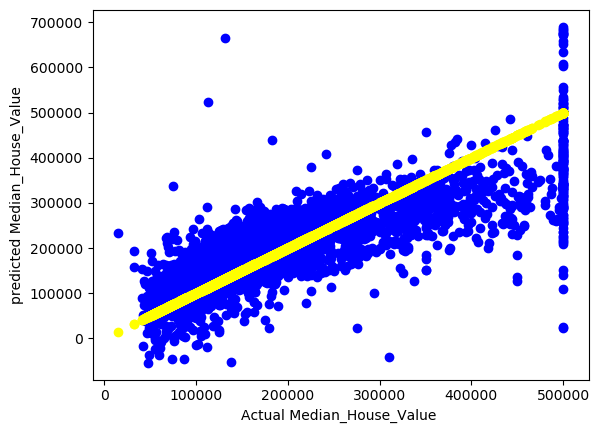

In [188]:
plt.scatter(test_y, y_pred_test_linear, color='blue', label='Predicted Values Linaer')
plt.scatter(test_y, test_y, color='yellow', label='Actual Values (test_y) Linear')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()

Predicting target variable on test set using Lasso Regression

In [189]:
y_pred_test_lasso = lasso_best.predict(test_x)
y_pred_test_lasso

array([125038.46102046,  75137.14905522, 334984.15057454, ...,
       128936.64991072, 273152.5694083 , 327702.33711831])

Plotting predicted vs. actual values for test data using Lasso Regression

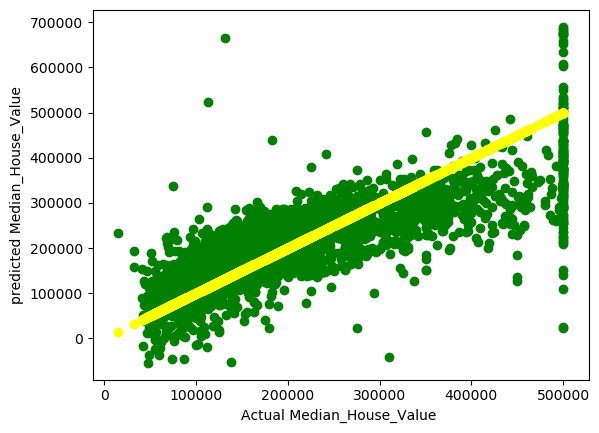

In [190]:
plt.scatter(test_y, y_pred_test_lasso, color='green', label='Predicted Values Lasso')
plt.scatter(test_y, test_y, color='yellow', label='Actual Values (test_y) Lsso')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()

Predicting target variable on test set using Ridge Regression

In [191]:
y_pred_test_ridge = ridge_lr_best.predict(test_x)
y_pred_test_ridge

array([124995.68896293,  75187.84486903, 334992.08960061, ...,
       128929.79882918, 273127.05293482, 327705.87907992])

Plotting predicted vs. actual values for test data using Ridge Regression

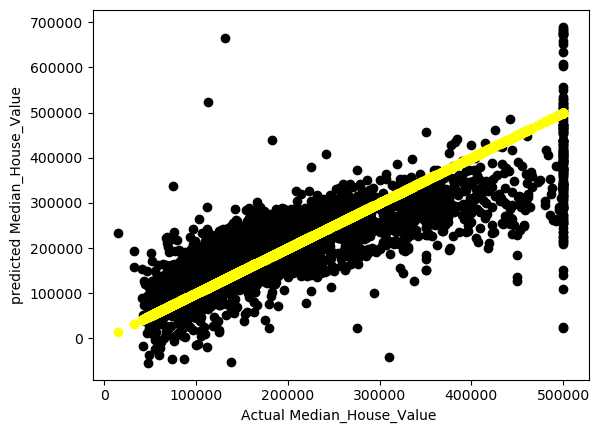

In [192]:
plt.scatter(test_y, y_pred_test_ridge, color='black', label='Predicted Values Ridge')
plt.scatter(test_y, test_y, color='yellow', label='Actual Values (test_y) Ridge')
plt.xlabel("Actual Median_House_Value ")
plt.ylabel("predicted Median_House_Value")
plt.show()

Displaying performance of models on test set

In [193]:
print("Test Set Performance:")
evaluate_model("Linear Regression", test_y, y_pred_test_linear)
evaluate_model("Lasso Regression", test_y, y_pred_test_lasso)
evaluate_model("Ridge Regression", test_y, y_pred_test_ridge)


Test Set Performance:
Linear Regression - Mean Squared Error: 4832043335.66, Mean Absolute Error: 49751.76
Lasso Regression - Mean Squared Error: 4831941323.25, Mean Absolute Error: 49751.46
Ridge Regression - Mean Squared Error: 4832011288.96, Mean Absolute Error: 49751.65


Test Set Performance Results:
 - The Linear Regression model achieved a Mean Squared Error (MSE) of approximately 4.83 billion and a Mean Absolute Error (MAE) of around 49,752.
 - The Lasso Regression model's performance was nearly identical, with a slight improvement in MSE but the same MAE.
 - The Ridge Regression model demonstrated a marginally lower MSE and slightly improved MAE compared to the other models, indicating it may handle regularization slightly better in this case.
 Overall, each model produced similar error metrics, showing comparable performance on the test data.


Ridge Regression would be the preferred model, as it consistently provided the lowest MSE on validation and test sets, indicating it generalizes slightly better to unseen data. This model likely benefits from regularization, which helps it avoid overfitting while still capturing essential patterns in the data.